# ¿Qué factores impulsan la discriminación salarial entre hombres y mujeres en su organización?

In [1]:
!pip install bqplot

In [4]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
#import plotly.plotly           as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

## Introduccion

**Contexto empresarial**. Eres un científico de datos en una gran organización. Su empresa está pasando por una revisión interna de sus prácticas de contratación y compensación de empleados. En los últimos años, su empresa ha tenido poco éxito en la conversión de candidatas de alta calidad que deseaba contratar. La gerencia plantea la hipótesis de que esto se debe a una posible discriminación salarial y quiere averiguar qué lo está causando.


**Problema empresarial.** Como parte de la revisión interna, el departamento de recursos humanos se ha acercado a usted para investigar específicamente la siguiente pregunta: <b>"En general, ¿se les paga más a los hombres que a las mujeres en su organización? De ser así, ¿cuál es conduciendo esta brecha?"</b>

**Contexto Analítico**. El departamento de recursos humanos le proporcionó una base de datos de empleados que contiene información sobre varios atributos, como desempeño, educación, ingresos, antigüedad, etc. Usaremos técnicas de regresión lineal en este conjunto de datos para resolver el problema comercial descrito anteriormente. Veremos cómo la regresión lineal cuantifica la correlación entre la variable dependiente (salario) y las variables independientes (por ejemplo, educación, ingresos, antigüedad, etc.)

El caso está estructurado de la siguiente manera: (1) realizaremos un análisis exploratorio de datos para investigar visualmente las diferencias en el pago; (2) usar los conocimientos observados para ajustar formalmente los modelos de regresión; y finalmente (3) abordar el problema de la discriminación salarial.

## EDA

In [5]:
Data = pd.read_csv('glassdoordata.csv')

In [6]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Variables disponibles:

* **Job Title**: the title of the job (e.g. “Graphic Designer”, “Software Engineer”, etc);
* **Gender**: male or female;
* **Age**: age;
* **Performance**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **Education**: different levels of education (e.g. "College", "PhD", "Masters", "Highschool");
* **Department**: different departments in the organization (e.g. "Operations", "Management", etc);
* **Seniority**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **Income, bonus**: both expressed in dollars

Creemos una variable con la compensacion total <code>pay</code>:

In [7]:
Data['pay'] = Data['income'] + Data['bonus']

In [8]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


###  Ejercicio 1:

#### 1.1
Construya un diagrama de caja que compare el salario entre hombres y mujeres. ¿Qué puedes concluir?


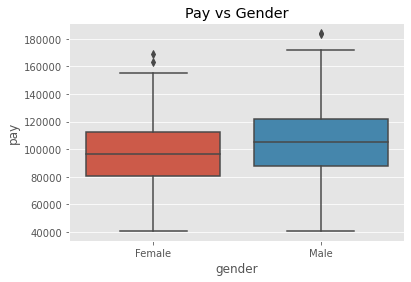

In [9]:
sns.boxplot(x='gender', y = 'pay', data = Data) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Pay vs Gender");

#### 1.2
Realice una prueba de $t$ sobre la diferencia en el salario promedio entre hombres y mujeres. ¿Qué puedes concluir?

In [10]:
## t test simple para prueba de medias
t2, p2 = stats.ttest_ind(Data.loc[Data['gender'] == 'Male', 'pay'],Data.loc[Data['gender'] == 'Female', 'pay'])
print("t = " + str(t2))
print("p = " + str(p2))

t = 5.407461816876623
p = 8.000016978237565e-08


#### 1.3
Construya un diagrama de caja de pago, con respecto a los siguientes atributos: antigüedad, educación, cargo y desempeño. También haz un gráfico de dispersión de salario vs. edad. ¿Qué patrones observas?

In [11]:
pay_by_gender = Data.groupby('gender')['pay']
pay_by_gender.mean()

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

In [12]:
pay_by_gender.mean()['Male'] - pay_by_gender.mean()['Female']

8501.847374847363

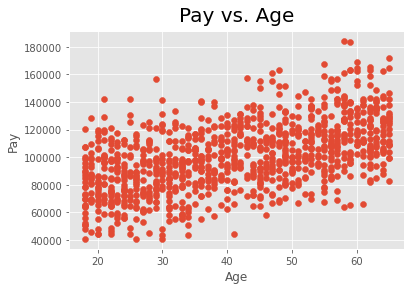

In [13]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

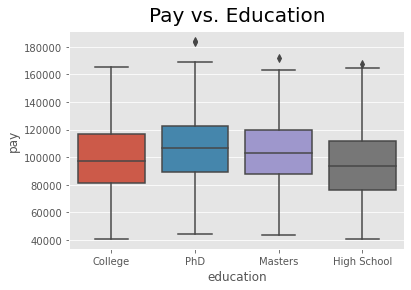

In [14]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

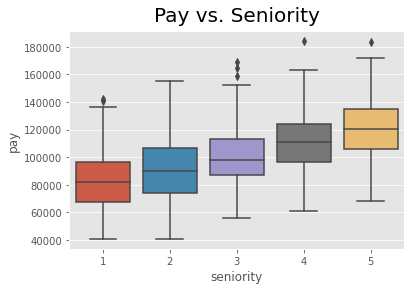

In [15]:
sns.boxplot(x='seniority', y = 'pay', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

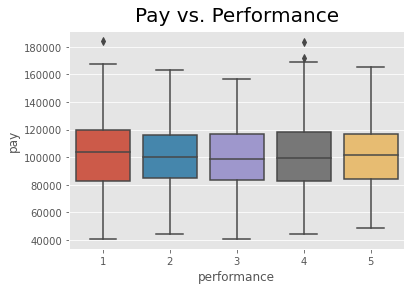

In [16]:
sns.boxplot(x='performance', y = 'pay', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

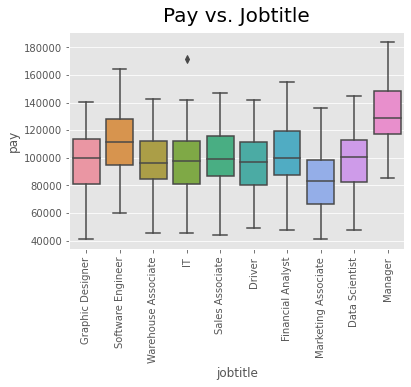

In [17]:
sns.boxplot(x='jobtitle', y = 'pay', data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

****Respuesta:**** Hay una variación significativa de pago en algunos de los atributos. Aumentos salariales con la antigüedad. Entre los títulos de trabajo, los gerentes reciben un salario relativamente alto en promedio. A los asociados de marketing se les paga mucho menos. El salario frente a la educación es similar para todas las categorías, excepto para las personas que solo tienen educación secundaria. Se les paga en promedio mucho menos. Existe una relación lineal entre salario y edad.


### Ejercicio 2:
Ahora, hagamos las mismas gráficas que en el Ejercicio 1.3, pero diferenciándolas adicionalmente por género. ¿Qué patrones observas?

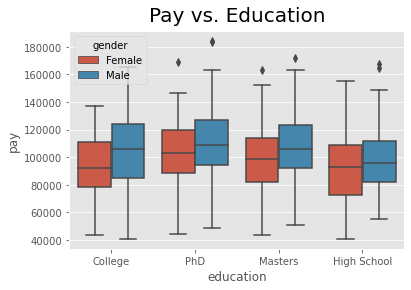

In [18]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

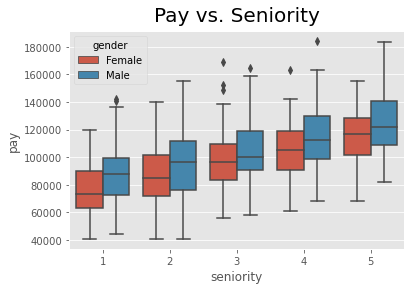

In [19]:
sns.boxplot(x='seniority', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

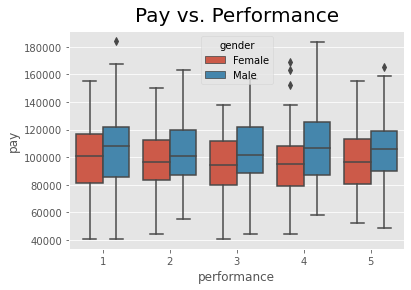

In [20]:
sns.boxplot(x='performance', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

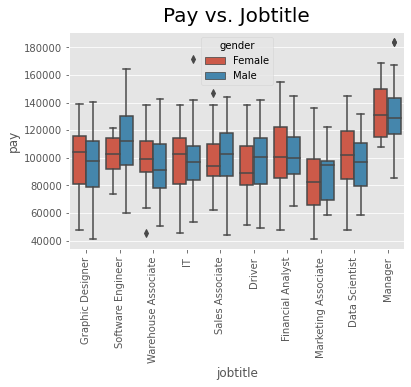

In [21]:
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

Hay bastante variación de pago en varias categorías (como antigüedad, desempeño, título del trabajo, etc.). Dentro de cada categoría, hay alguna diferencia entre el salario de hombres y mujeres, pero no tanta como entre categorías.

### Ejercicio 3

Considere las siguientes declaraciones:

I. Según el diagrama de caja y la tabla, el salario promedio de los hombres es 8500 USD más que el de las mujeres en esta organización.

II. A los hombres se les paga significativamente más que a las mujeres debido únicamente a las diferencias de género.

¿Cuál de las siguientes conclusiones sobre estas afirmaciones es correcta?

a. Ambas afirmaciones I y II son correctas.

b. El enunciado I es correcto, pero el enunciado II no lo es.

C. El enunciado I no es correcto, pero el enunciado II sí lo es.

d. Ambas afirmaciones I y II son incorrectas.

**Respuesta**. La afirmación I es verdadera tal como lo muestran las tablas y la gráfica. Sin embargo, no podemos concluir que la Declaración II sea correcta. Esto se debe a que puede haber otros factores que contribuyan a que los hombres paguen más. Por ejemplo, los hombres en este conjunto de datos pueden estar todos en puestos superiores, mientras que la mayoría de las mujeres están en puestos inferiores. El salario suele aumentar con la antigüedad. Por lo tanto, si no tenemos en cuenta la antigüedad al calcular la brecha salarial, podríamos estar comparando manzanas con naranjas.

## Cuales son las variables que influencian el pago?

<p>Como discutimos en el Ejercicio 3 y también vimos en la exploración de datos, aunque existe una diferencia salarial significativa entre los géneros, también hay otros factores en el trabajo que impulsan esta diferencia. Por lo tanto, ignorar estos factores al abordar la discriminación salarial podría conducir a conclusiones erróneas o engañosas sobre cómo abordar el problema.</p>

<p>¿Cómo tenemos en cuenta la influencia de las demás variables en el salario? ¿Cuáles son estas variables?
Un buen lugar para comenzar es inspirarse en nuestro análisis exploratorio de datos anterior. La única variable numérica en este conjunto de datos es la edad, así que comencemos con un gráfico de dispersión de salario frente a edad:</p>

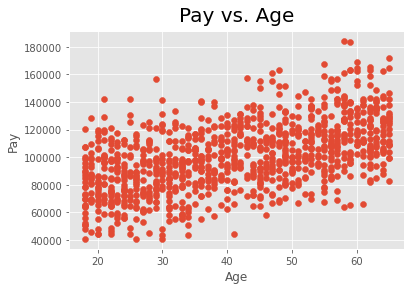

In [22]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay");

### La correlación mide la relación lineal entre dos variables
Vemos una relación lineal entre salario y edad. El salario parece estar <b>correlacionado</b> positivamente con la edad; es decir, cuanto mayor es alguien, más tiende a cobrar. Por lo tanto, podría ser que haya más hombres en nuestro conjunto de datos que sean mayores y la diferencia salarial entre hombres y mujeres que vemos podría ser una consecuencia de esto. La <b>correlación</b> de cantidades mide cuán lineal es la relación entre dos variables. Adivina la correlación entre el salario y la edad.

### Repasando correlacion

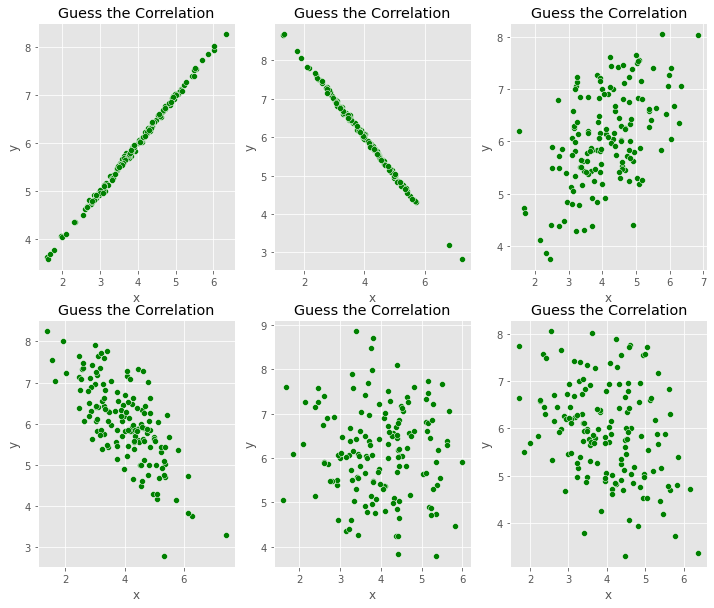

In [23]:
plt.figure(figsize=(12,10))
rho = [0.999, -0.999, 0.5, -0.7,0.001,-0.3]
cor_list = []
np.random.seed(10)
for i, r in enumerate(rho):
    plt.subplot(2,3,i+1)
    mean, cov = [4, 6], [(1, r), (r, 1)]
    x, y = np.random.multivariate_normal(mean, cov, 150).T
    ax = sns.scatterplot(x=x, y=y, color="g")
    cor_list.append(np.corrcoef(x,y)[0,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Guess the Correlation")

In [24]:
cor_list

[0.9990081442281223,
 -0.9992506121564404,
 0.5047051300834765,
 -0.7228982219723217,
 -0.04041125768713201,
 -0.32083184263386655]

### Pregunta

Si la correlación entre dos variables es cero, entonces las dos variables no están relacionadas. ¿Es esto cierto o falso?

Esto es **Falso** Podría haber relaciones no lineales entre las variables, y estas pueden no ser capturadas por la correlación, que es una medida lineal. En tales casos, se requieren modelos avanzados que capturen relaciones no lineales.

### Matriz de correlacion
Para encontrar las variables que tienen la mayor influencia en el pago, podemos calcular una <b>matriz de correlación</b> que mide las correlaciones por pares entre dos variables cualesquiera:

In [25]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

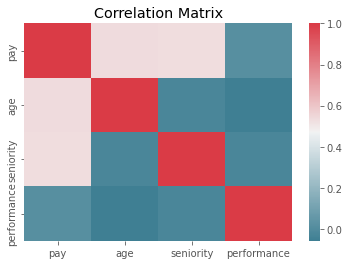

In [26]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

## Uso de modelos lineales para dar cuenta de variables correlacionadas con el pago 

Una vez que identificamos algunas variables independientes que están correlacionadas con la variable dependiente, se puede usar un modelo lineal para capturar esta relación cuantitativamente. Un modelo lineal hace esto encontrando una línea que **mejor se ajusta** a los puntos de datos:

Text(1.5500000000000043, 0.5, 'Pay')

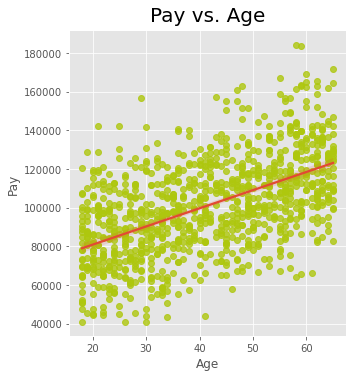

In [27]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay")

Una linea tiene dos parametros – intercepto ($\beta_0$) y pendiente ($\beta_1$). Entonces el modelo lineal para pay vs. age se puede representar como:
 $$ \mathrm{pay} = \beta_0 + \beta_1 \mathrm{age} + \mathrm{error}. $$

La interpretación del coeficiente $\beta_1$ es la siguiente: un aumento de un año en la edad provocará en promedio un cambio de $\beta_1$ USD en el salario. El intercepto $\beta_0$ se puede considerar como una especie de pago "de referencia".

## Modelo lineal básico

In [30]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.04e-74
Time:                        08:07:34   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

### ¿En qué debemos centrarnos en la tabla de regresión?
Aunque la tabla de salida anterior contiene mucha información, solo debemos centrarnos en una pequeña cantidad de cantidades.
Estos son los coeficientes (las estimaciones de $\beta_0$ y $\beta_1$), así como sus valores cuadrados de $p$ y $R$.

### Coeficientes
El intercepto $\beta_0$ es de aproximadamente 62060 USD. Esto se puede considerar como el salario base. (Con frecuencia, el intercepto no tiene una interpretación significativa; está bien). La pendiente (el coeficiente $\beta_1$ para la edad) es 939,25. La interpretación de este coeficiente es como se explicó anteriormente: si un empleado envejece un año, se espera que su salario aumente en 939,25 USD en promedio.

### $p$-valores
La hipotesis nula bajo prueba es:
$$ H_0:  \beta_1 = 0 $$ 
y la alternativa:
$$ H_a: \beta_1 \neq 0.$$
El valor p de $\beta_1$ (dado bajo la columna: $"P>|t|"$) es 0,000. Por lo tanto, es estadísticamente significativa al nivel de 0.05 y rechazamos la hipótesis nula. Esto implica que la edad sí explica algunas de las diferencias salariales.

## $R$-cuadrado
Una de las cantidades clave a las que se debe prestar atención al interpretar una tabla de regresión es la cantidad
$R$ al cuadrado. Tenga en cuenta que la tabla muestra $R$ al cuadrado y $R$ al cuadrado ajustado. Nos centraremos en $R$ al cuadrado. Esta cantidad siempre va a estar entre 0 y 1. Para el modelo de pago contra edad, esta cantidad es 0.285 = 28.5%. En esta organización, hay una gran variación en el pago: a diferentes empleados se les paga diferentes cantidades.

Un $R$ al cuadrado de 28,5% en este modelo lineal significa que esta variación observada en el pago no se debe al azar; más bien, el factor edad explica sistemáticamente el 28,5% de esta variación salarial. Cuanto mayor sea el $R$ al cuadrado, mayor será el porcentaje de variación observada que el modelo puede explicar. Dado que <code>model1</code> solo explica alrededor del 28,5 % de la variación, esto nos motiva a investigar si se pueden utilizar otros factores además de la edad para explicar las diferencias salariales.

### Relacion entre correlación y $R$-squared

In [31]:
corr_age_pay = np.corrcoef(Data['pay'],Data['age'])[0,1]
corr_age_pay*corr_age_pay

0.28485128851108327

### Interpretacion geometrica de $R$-Squared
La formula del $R$-squared es:
  $$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$

Aquí **RSS** y **TSS** denotan la suma de cuadrados residual y total respectivamente. Para entender lo anterior
cuidadosamente la fórmula, representemos de nuevo el salario frente a la edad.

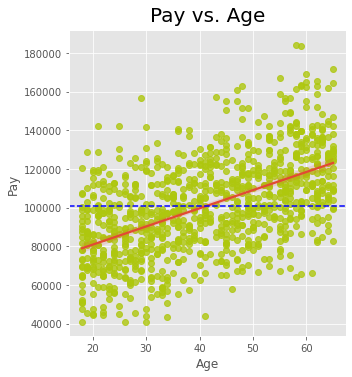

In [32]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.axhline(Data['pay'].mean(), ls='--',color = 'b')
plt.xlabel("Age")
plt.ylabel("Pay");

Condideremosl el <code>model0</code> dado por:
 $$ \mathrm{pay} = \beta_0 + \mathrm{error} $$

La mejor suposición para $\beta_0$ es solo el salario promedio. Esto viene dado por la línea azul. La suma de los cuadrados de los residuos aquí se llama la suma total de cuadrados (TSS).
R-squared mide qué tan bien la línea de regresión de <code>model1</code> (pago versus edad) dada por la línea roja explica la variación observada en comparación con <code>model0</code>. La suma de cuadrados residuales para este modelo es el RSS.

### Calculando el $R$-Squared 

In [33]:
# you can 'peek' inside the object lm1 using the dir command
dir(lm1)
# for instance if you want to know what the fitted values are
## lm.fittedvalues

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [34]:
# Residuales
res = Data['pay'] - lm1.fittedvalues
res[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [35]:
# Verificar si los residuales dan igual
lm1.resid[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [36]:
# media de pago
mean_pay = Data['pay'].mean()

## TSS
TSS = sum((Data['pay'] - mean_pay)*(Data['pay'] - mean_pay))
TSS

## RSS
RSS = sum(res*res)

In [37]:
R_squared = (TSS - RSS)/TSS
R_squared

0.28485128851108454

## Mirando la edad y el género: Variables categóricas

Ahora que hemos visto que la edad explica parte de la relación con el salario, consideremos un modelo en el que tengamos en cuenta la edad y el género simultáneamente. La edad es una variable numérica (p. ej., 26,5, 32). Por el contrario, el género toma solo dos valores: masculino y femenino. Estas variables se denominan <b>variables categóricas</b>. La forma en que interpretamos los coeficientes de las variables tipo factor en el modelo lineal es ligeramente diferente a la de las variables numéricas:

In [38]:
model2 = 'pay~age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           8.10e-84
Time:                        08:12:46   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

La interpretación del coeficiente de edad es la misma que antes: si la edad aumenta en un año, se espera que el salario aumente en 948,5 USD. Ahora, concéntrate en el coeficiente de género. Muestra masculino (T.masculino) solamente, porque la categoría femenina se toma como categoría predeterminada. (Tenga en cuenta que la elección de la categoría predeterminada no importa: fácilmente podríamos haber elegido hacer que la categoría predeterminada sea masculina y, por lo tanto, el coeficiente de género sería T.femenino). El coeficiente 9279.3180 se interpreta de la siguiente manera: para empleados de la misma edad, en promedio, los hombres ganan 9279.3180 USD más que las mujeres.

Pero aún no hemos respondido satisfactoriamente nuestra pregunta principal. Hasta ahora, solo hemos tenido en cuenta la edad además del género para explicar las brechas salariales. Todavía hay algunos factores más que podrían afectar el pago. Consideramos la educación a continuación. La siguiente gráfica muestra que a los empleados con al menos una educación universitaria se les paga más:

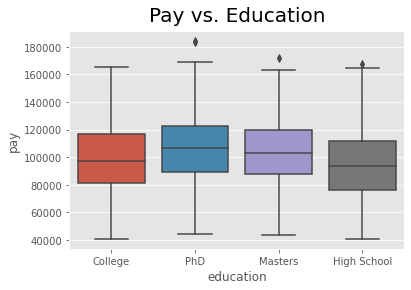

In [39]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

### Ejercicio 4

Proporcione el código para ajustar un modelo lineal con salario como variable dependiente y edad, género y educación como variables independientes. Compara el $R$ al cuadrado de esto con el de <code>model2</code>. ¿Qué conclusiones podemos sacar?

**Respuesta**. El $R$ al cuadrado aumentó de 28,5% a 34,5%. Esto significa que la educación ayuda a explicar un poco más
variación que no se explica por la edad y el sexo.

In [40]:
model3 = 'pay~age + gender + education'
lm3   = sm.ols(formula = model3, data = Data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           8.74e-89
Time:                        08:13:56   Log-Likelihood:                -11340.
No. Observations:                1000   AIC:                         2.269e+04
Df Residuals:                     994   BIC:                         2.272e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Ejercicio 5:

¿Cuál de las siguientes afirmaciones es falsa? Después de tener en cuenta la edad y el sexo:

(a) A los empleados con educación universitaria se les paga 3906 USD más en promedio que a los que solo tienen un título de escuela secundaria.

(b) A los empleados con solo un título de escuela secundaria se les paga 7500.1 USD menos en promedio en comparación con aquellos con una maestría.

(c) Los empleados con un doctorado ganan en promedio 2556.20 USD más que aquellos con una maestría.

(d) Los empleados con una maestría ganan en promedio 8077.3 USD más que aquellos con solo un título de secundaria.

**Respuesta**.
(a) Correcto. Para el modelo lineal: 'pago~sueldo + género + educación', la educación es una variable categorica y la educación universitaria es la predeterminada debido al orden alfabético. Obtenemos que el coeficiente de la escuela secundaria sea -3906.3104.

(b) ¡Incorrecto! Para el modelo lineal: 'sueldo+género+educación', la diferencia de los coeficientes de bachillerato y maestría da la respuesta requerida. Esto se debe a que (escuela secundaria - universidad) - (maestría - universidad) = (escuela secundaria - maestría).

c) ¡Incorrecto! Para el modelo lineal: 'salario + género + educación', la diferencia de los coeficientes de maestría y doctorado da la respuesta requerida. Esto se debe a que (PhD - universidad) - (maestría - universidad) = (PhD - maestría).

d) ¡Incorrecto! Para el modelo lineal: 'sueldo+género+educación', la diferencia de los coeficientes de bachillerato y maestría da la respuesta requerida. Esto se debe a que (escuela secundaria - universidad) - (maestría - universidad) = (escuela secundaria - maestría).

## Modelo integrado con todas las variables

In [41]:
model4 = 'pay~jobtitle + age + performance + education + department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:15:47   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Ejercicio 6:

Teniendo en cuenta todos los factores como en <code>model4</code>, ¿cuál de los siguientes trabajos paga más?

(a) Asociado de marketing

(b) Ingeniero de software

(c) Gerente

(d) Diseñador Gráfico

**Respuesta**.

(a) Incorrecto.

(b) Incorrecto.

c) ¡Correcto!

(d) Incorrecto.


## Revisando la cuestión de la discriminación salarial

Ahora que hemos analizado y tenido en cuenta varios atributos que están correlacionados con el salario, volvamos a examinar la cuestión de qué está impulsando la discriminación salarial. <code>model4</code>, que tiene en cuenta todas las variables del conjunto de datos, tiene un $R$ al cuadrado del 84,1 %. Esta es definitivamente una gran mejora con respecto a <code>model1</code> (pago frente a edad), que tiene un $R$ al cuadrado del 28,5 %. Por lo tanto, en comparación con <code>model1</code>, <code>model4</code> explica un 84,1 % - 28,5 % = 55,6 % más de la variación observada en los datos.

### Ejercicio 7:

Con base en el análisis que hemos hecho hasta ahora (<code>model1</code> - <code>model4</code>), considere las siguientes declaraciones.

I. Después de tener en cuenta el cargo, la educación, el desempeño y la edad, la proporción de la diferencia salarial atribuible únicamente al género es pequeña.

II. Existe evidencia de que la discriminación salarial entre hombres y mujeres se debe únicamente al género.

III. Hay razones para creer que podría haber una cantidad desproporcionada de mujeres en trabajos peor pagados.
como marketing, mientras que podría haber más hombres en trabajos mejor pagados, como gerente.

Elige la respuesta correcta:

(a) I es correcta, II y III son incorrectas.

(b) II es correcta, I y III son incorrectas.

(c) I es incorrecta, II y III son correctas.

(d) I y III son correctas, II es incorrecta.

**Responder.**

(a) Incorrecto. 

(b) Incorrecto. 

c) Incorrecto.

(d) ¡Correcto! 

Sabemos por el modelo 4 que el coeficiente de género no es significativo (392,3244 USD, y este coeficiente no es significativo). Por lo tanto, I es correcto y II es incorrecto. Pero desde el primer gráfico que hicimos, vimos que la diferencia salarial promedio entre hombres y mujeres en esta organización es de unos 8500 USD. La explicación clave de esta discrepancia es que las mujeres tienen trabajos peor pagados que los hombres. Así III es correcto.


## Investigar la distribución de género a través de la antigüedad y los tipos de trabajo

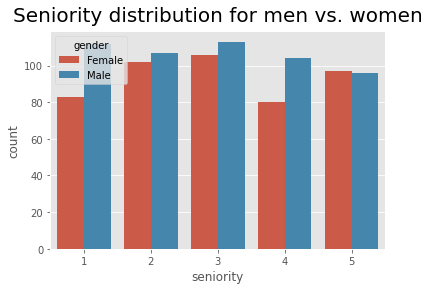

In [42]:
sns.countplot(x='seniority', hue = 'gender', data = Data) 
plt.title("Seniority distribution for men vs. women", fontsize=20, verticalalignment='bottom');

Sin embargo, observar la distribución de las mujeres en varios tipos de trabajo revela una historia diferente. En el siguiente diagrama de barras, vemos que las mujeres están desproporcionadamente subrepresentadas en la ingeniería de software y en los roles gerenciales. Además, las mujeres están desproporcionadamente sobrerrepresentadas en el puesto de asociado de marketing:

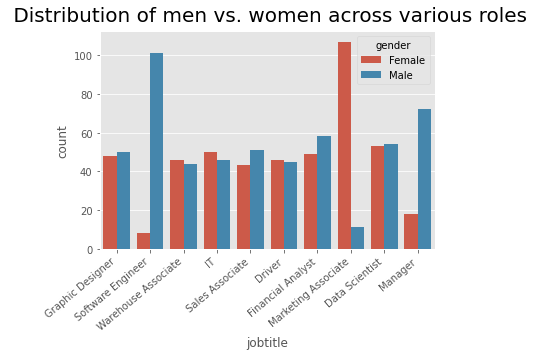

In [43]:
pl = sns.countplot(x="jobtitle", hue= "gender", data= Data)
pl.set_xticklabels(pl.get_xticklabels(), rotation=40, ha="right");
plt.title(" Distribution of men vs. women across various roles", fontsize=20, verticalalignment='bottom');

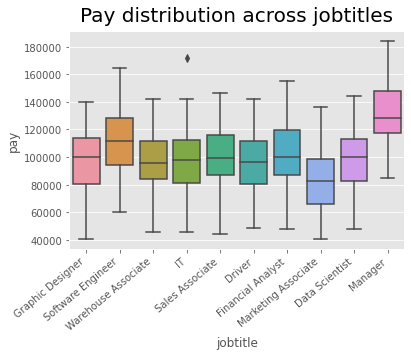

In [44]:
pl2 = sns.boxplot(x="jobtitle", y = "pay", data = Data)
pl2.set_xticklabels(pl2.get_xticklabels(), rotation=40, ha="right");
plt.title("Pay distribution across jobtitles", fontsize=20, verticalalignment='bottom');

El gráfico anterior muestra que el gerente y el asociado de marketing tienen los salarios promedio más altos y más bajos, respectivamente. También vemos en el gráfico anterior que la proporción de mujeres es la más baja y la más alta en los roles de gerente y asociado de marketing, respectivamente. Esto explica visualmente el resultado de nuestro modelo de regresión sobre por qué no hay evidencia de discrepancia salarial después de tener en cuenta todos estos factores.

## Conclusiones

Utilizamos las técnicas de regresión lineal para determinar si existía o no discriminación salarial basada en el género dentro de su organización. Modelamos el efecto de varias variables independientes (en este caso, antigüedad, edad, desempeño y cargo) para explicar la variación observada en una variable dependiente (en este caso, salario). Examinamos la estadística de $R$ al cuadrado de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en el pago fue explicado por las variables independientes.

Vimos que la diferencia en el salario promedio entre hombres y mujeres es de aproximadamente 8500 USD en estos datos. Sin embargo, esta diferencia se convirtió en 400 USD y es estadísticamente indistinguible (valor p$ = 0,584) de cero después de controlar los otros factores correlacionados con el pago. Sin embargo, una exploración más profunda de los datos sugirió que las mujeres están desproporcionadamente sobrerrepresentadas en los trabajos peor pagados, mientras que los hombres están desproporcionadamente sobrerrepresentados en los trabajos mejor pagados.

Por lo tanto, se justifica una investigación sobre las prácticas de contratación, promoción y colocación laboral de hombres y mujeres. En su informe al departamento de recursos humanos, debe pedirles que analicen las siguientes preguntas:

1. ¿Las mujeres eligen o se ven obligadas a aceptar trabajos peor pagados?
2. ¿Se discrimina a las mujeres en los procesos de contratación para puestos mejor remunerados?

## Para recordar

En este caso, aprendió a aprovechar sus habilidades en el análisis exploratorio de datos para construir un modelo lineal eficaz que tuviera en cuenta varios factores relacionados con el resultado de interés (pago). Crucialmente, aprendimos que:

1. Mirar directamente la relación entre el resultado de interés y la variable independiente de interés no es suficiente; puede haber varios factores de confusión.
2. Es importante realizar EDA antes de construir cualquier modelo para descubrir y tener en cuenta estos factores de confusión que podrían estar impulsando las diferencias en el resultado de interés.
3. $R$ al cuadrado es una cantidad importante que explica qué tan bien su modelo explicó la variación observada. Se puede utilizar para comparar diferentes modelos.